In [166]:
!pip install kumaraswamy

In [1]:
from kumaraswamy import kumaraswamy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



## Experiments with Kumaraswamy Function

In [2]:
d1 = kumaraswamy(a=0.1, b=0.7)

In [3]:
d1.pdf(0.9)

array(0.30210796)

In [4]:
d1.cdf(0.21)

array(0.7418337)

In [5]:
d1.var

0.07907948744725794

In [6]:
d1.mean

0.17121255852442666

### CCTE

In [7]:
from scipy.special import hyp2f1
from scipy.special import betainc
#The incomplte Beta function


In [8]:
def num_1(alpha,t,a,b,theta):
    v1=-(1/a)
    v2=b
    v3=1+b
    v4=(1-alpha)**(1/b)
##This is the first term in the numerator
    p1=(t-1)*(theta*t-1)
    p2=(1-alpha)*(hyp2f1(v1,v2,v3,v4))
    return p1*p2 #The product of 2  terms is the first term
    

In [9]:
def num_2(alpha,t,a,b,theta):
    #This gives the negative of the second term
    a3=1+(1/a)
    p=alpha**b
    b3=2*b
    p3=2*(theta)*t*(t-1)*b
    p4=[betainc(a3,b,1)+betainc(a3,b3,1)-betainc(a3,b,p)-betainc(a3,b3,p)]
    prod=p4[0]*p3
    return prod


In [10]:
#This defines the FGM Copula for kumaraswamy distribution
# Some checks required
def FGM_copula(alpha,t,a,b,theta,a1,b1):
    d1 = kumaraswamy(a, b)
    d2 = kumaraswamy(a1, b1)
    s1 = d1.cdf(alpha)
    s2 = d2.cdf(t)
    copula=(s1)*(s2)+theta*(s1)*(s2)*(1-s1)*(1-s2)
    return copula
    
    
    
def deno(alpha,t,a,b,theta,a1,b1):
    t1=1-alpha-t
    t2= FGM_copula(alpha,t,a,b,theta,a1,b1)
    return t1+t2
    

In [11]:
FGM_copula(0.3,0.5,0.7,0.8,2,0.6,0.8)

0.32232193347566945

In [12]:
#Here a,b, alpha are for first distribution and a1,b1,t are for second distribution
def ccte_fun(alpha,a,b,t,a1,b1,theta):
    num=num_1(alpha,t,a,b,theta)+num_2(alpha,t,a,b,theta)
    den=deno(alpha,t,a,b,theta,a1,b1)
    return num/den
    

In [13]:
ccte_fun(0.2,0.5,0.8,0.9,0.8,0.9,0.4)

-0.3503350944639705

In [14]:

num_2(0.2,0.7,0.8,0.9,4)

-2.838277127208187

In [15]:
import numpy as np
def matrix(n):
    a=(n,n)
    return np.zeros(a)

In [16]:
c=matrix(3)

In [17]:
import numpy as np

In [18]:
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
c[1,2]=25

In [20]:
c

array([[ 0.,  0.,  0.],
       [ 0.,  0., 25.],
       [ 0.,  0.,  0.]])

In [21]:
def update_matrix(mat,i,j,alpha,a,b,t,a1,b1,theta):
    #input here whcih element we want to update(exact index)
    mat[i-1,j-1]=ccte_fun(alpha,a,b,t,a1,b1,theta)
    

In [22]:
update_matrix(c,2,2,0.2,0.5,0.8,0.9,0.8,0.9,0.4)

In [23]:
c

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , -0.35033509, 25.        ],
       [ 0.        ,  0.        ,  0.        ]])

### The OOP part

In [24]:
class ccte:
    """
        A class used to get ccte of bivariate kumaraswamy distribution
        
        ...
        
        Attributes
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        a,b: float
            The kumaraswamy distribution parameters for the first variable
        t: float    
            The percentile for the first kumaraswamy variable
        a1,b1: float
            The kumaraswamy distribution parameters for the second variable
        ccte_value : float
            Stores the value of CCTE
        
        
        
        Methods
        ------
        ccte_calc:float
            Stores the ccte of first varible with repect to another 
            This assumes both the variables are kumaraswamy and copula used is FGM copula
            Stores the value of CCTE in ccte_value
    """

    def __init__(self, alpha,a,b,t,a1,b1):
       
        """
            Parameters
            ------
            alpha: float
                The percentile for the first kumaraswamy variable
            a,b: float
                The kumaraswamy distribution parameters for the first variable
            t: float    
                The percentile for the first kumaraswamy variable
            a1,b1: float
                The kumaraswamy distribution parameters for the second variable
        """
        self.alpha = alpha
        self.a = a
        self.b = b
        self.t = t
        self.a1 = a1
        self.b1 = b1
     
             
       
            
        
       
       
        
        
    def ccte_calc(self,theta):
        
        """ Returns the ccte(conditional copula tail expectation) for first variable with repect to second
         and the copula used is FGM copula
         
         
        Parameters
        ------
        Theta: float
            The dependence paramater of FGM copula 
        """
        
        alpha=self.alpha
        a=self.a
        b=self.b
        t=self.t
        a1=self.a1
        b1=self.b1
        self.ccte_value=ccte_fun(alpha,a,b,t,a1,b1,theta)
        return ccte_fun(alpha,a,b,t,a1,b1,theta)

In [25]:
obj=ccte(0.2,0.5,0.8,0.9,0.8,0.3)

In [26]:
obj.ccte_calc(0.2)

-0.21156365084895895

In [128]:
class dispersion_matrix:
    
    """
        A class used to store the dispersion matrix of a network
        
        ...
        
        Attributes
        ------
        n: int
            stores the value of size of matrix
        matrix: array(2D)
            Stores the zeros matrix of size n*n
        p: array(2D)
            Stores the updated matrix
            
            
        Methods
        ------
        matrix_def():
            builds a n*n matrix with all entries as zeros
        update_mat(i,j,alpha,a,b,t,a1,b1,theta)
            updates the (i,j) eleemnt of the dispersion matrix with the CCTE of i-th element with repect to jth 
            element
        num_1(alpha,t,a1,b1,theta):
            Gives the first term of the numerator(to be used internally for getting the ccte)
        num_2(self,alpha,t,a1,b1,theta):
            Gives the second term of the numerator(to be used internally for getting the ccte)
        FGM_copula(alpha,t,a1,b1,theta,a2,b2)
            Gives the FGM copula of 2 kumaraswamy distributions given the percentile alpha(corresponding params
            a1 and b1) and t(corresponding params a2 and b2)
        deno(alpha,t,a1,b1,theta,a2,b2)
            Gives the Denominator for ccte(to be used internally for getting the ccte)
        ccte_fun(self,alpha,a1,b1,t,a1,b1,theta)
            Calculates the ccte of kumaraswamy varible with parameters a1,b1 with respect to the one 
            with parameters a2,b2  
        update_clus_mat(self,i,j,alpha,k1,t,k2,theta)
            Gets and updates the distance matrix on which the clustering has to be done 
            The matrix is symmetric and is passed to hirarchical cluster maker
       """
    
    
    def __init__(self,n):
        
        """
        Parameters
        ------
        n: Thse size of dispersion matrix
        """
        self.n=n
        
    def num_1(self,alpha,t,k1,theta):
        """
      The function to gives the first term of the numerator to calculate the ccte 
        Parameters
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains kumaraswamy distribution
        t: float    
            The percentile for the first kumaraswamy variable
            
        Returns
        ------
        The first term in the numerator to calculate the ccte
        """
        v1=-(1/k1.a)
        v2=k1.b
        v3=1+k1.b
        v4=(1-alpha)**(1/k1.b)
    
        p1=(t-1)*(theta*t-1)
        p2=(1-alpha)*(hyp2f1(v1,v2,v3,v4))
        p3=(k1.upper-k1.lower)*p1*p2
        return p1*p2 #The product of 2  terms is the first term
    
    def num_2(self,alpha,t,k2,theta):
        """
      The function to gives the neagtive of the second term of the numerator to calculate the ccte
      
        Parameters
        
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains the first kumaraswamy distribution
        k2: Object
            The kumaraswamy_scaled object which contains the second kumaraswamy distribution
        t: float    
            The percentile for the second kumaraswamy variable
            
            
        Returns
        ------
        
        The neagtive of the second term in the numerator to calculate the ccte
        """
        
   
        a3=1+(1/k2.a)
        p=alpha**k2.b
        b3=2*k2.b
        p3=2*(theta)*t*(t-1)*k2.b
        p4=[betainc(a3,k2.b,1)+betainc(a3,b3,1)-betainc(a3,k2.b,p)-betainc(a3,b3,p)]
        prod=(k2.upper-k2.lower)*p4[0]*p3
        return prod
    
    def num_3(self,alpha,t,k1,k2,theta):
        """
      The function to gives the neagtive of the second term of the numerator to calculate the ccte
      
        Parameters
        
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains the first kumaraswamy distribution
        k2: Object
            The kumaraswamy_scaled object which contains the second kumaraswamy distribution
        t: float    
            The percentile for the second kumaraswamy variable
            
            
        Returns
        ------
        
        The neagtive of the second term in the numerator to calculate the ccte
        """
        
   
        m=1-alpha-t+alpha*t
        n=theta*alpha*t*(1-alpha)*(1-t)
        k=k1.lower*(m+n)
        return k
    
    def FGM_copula(self,alpha,t,k1,theta,k2):
        """
         
        Gives the FGM copula of 2 kumaraswamy distributions given the percentile alpha(corresponding params
        a1 and b1) and t(corresponding params a2 and b2)
       
        Parameters
        
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains first kumaraswamy distribution
        k2: Object
            The kumaraswamy_scaled object which contains second kumaraswamy distribution    
        t: float    
            The percentile for the second kumaraswamy variable
        Theta: float
            The dependence paramter of the FGM copula
            
        Returns
        ------
        The FGM copula between two input kumaraswamy variables with given percentiles
        
        
        """
        d1 = kumaraswamy(k1.a, k1.b)
        d2 = kumaraswamy(k2.a, k2.b)
        s1 = d1.cdf(alpha)
        s2 = d2.cdf(t)
        copula=(s1)*(s2)+theta*(s1)*(s2)*(1-s1)*(1-s2)
        return copula
    
    def deno(self,alpha,t,k1,theta,k2):
        """
        The function calculates the denominator that is used to calculate the ccte internally
        
        Parameters
        
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains first kumaraswamy distribution
        k2: Object
            The kumaraswamy_scaled object which contains second kumaraswamy distribution 
        t: float    
            The percentile for the second kumaraswamy variable
        Theta: float
            The dependence paramter of the FGM copula
            
            
        Returns
        ------
        The denominator to calculate the ccte
        """
        t1=1.-alpha-t
        t2= self.FGM_copula(alpha,t,k1,theta,k2)
        return t1+t2
    
    def ccte_fun(self,alpha,k1,t,k2,theta):
        """
        Parameters
        
        ------
        alpha: float
            The percentile for the first kumaraswamy variable
        k1: Object
            The kumaraswamy_scaled object which contains first kumaraswamy distribution
        k2: Object
            The kumaraswamy_scaled object which contains second kumaraswamy distribution 
        t: float    
            The percentile for the first kumaraswamy variable
        Theta: float
            The dependence paramter of the FGM copula
            
        Returns
        
        --------
        
        Calculates the ccte of kumaraswamy varible with parameters a1,b1 with respect to the one 
        with parameters a2,b2 
        """
        num=self.num_1(alpha,t,k1,theta)+self.num_2(alpha,t,k1,theta)+self.num_3(alpha,t,k1,k2,theta)
        den=self.deno(alpha,t,k1,theta,k2)
        return num/den
    
        
    def matrix_def(self):
        
        """  builds a n*n matrix with all entries as zeros
         
         
        Parameters
        ------
        None
        
        
        Returns
        -------
        A n*n matrix with all zeroes
        
        """
        self.matrix=(self.n,self.n)
        self.p=np.zeros(self.matrix)
        return self.p
    
    def update_mat(self,i,j,alpha,k1,t,k2,theta):
        """ Updates the (i,j) element of a matrix with the CCTE
         Stores the updated matrix in p(attribute)
        Parameters
        ------
        i,j: Index of the matrics
        alpha: float
            The percentile for the first kumaraswamy variable
        a1,b1: float
            The kumaraswamy distribution parameters for the first variable
        t: float    
            The percentile for the first kumaraswamy variable
        a2,b2: float
            The kumaraswamy distribution parameters for the second variable
            
        Returns
        ------
        An updated matrix p
         """
        
        self.p[i-1,j-1]=self.ccte_fun(alpha,k1,t,k2,theta)
        self.p[j-1,i-1]=self.ccte_fun(t,k2,alpha,k1,theta)
        return self.p
    
    def matrix_clus(self):
        
        """  builds a n*n matrix with all entries as zeros
        This stores 
         
         
        Parameters
        ------
        None
        
        
        Returns
        -------
        A n*n matrix with all zeroes
        
        """
        self.matrix2=(self.n,self.n)
        self.p2=np.zeros(self.matrix2)
        return self.p2
    
    def update_clus_mat(self,i,j,alpha,k1,t,k2,theta):
        """ Updates the (i,j) element of a matrix with the CCTE
         Stores the updated matrix in p(attribute)
        Parameters
        ------
        i,j: Index of the matrics
        alpha: float
            The percentile for the first kumaraswamy variable
        a1,b1: float
            The kumaraswamy distribution parameters for the first variable
        t: float    
            The percentile for the first kumaraswamy variable
        a2,b2: float
            The kumaraswamy distribution parameters for the second variable
            
        Returns
        ------
        An updated matrix p2
        """
        t1=self.ccte_fun(alpha,k1,t,k2,theta)
        t2=self.ccte_fun(t,k2,alpha,k1,theta)
        self.p2[i-1,j-1]=np.abs(t1-t2)
        self.p2[j-1,i-1]=np.abs(t1-t2)
        return self.p2
         

In [129]:
# link=sch.linkage(obj2.p2,'ward')
# def quasidiag(link):
#     link=link.astype(int)
#     sortix=pd.Series([link[-1,0],link[-1,1]])
#     numitems=link[-1,3]
#     while sortix.max()>=numitems:
#         sortix.index=range(0,sortix.shape[0]*2,2)
#         df0=sortix[sortix>=numitems]
#         i=df0.index;j=df0.values-numitems
#         sortix[i]=link[j,0]
#         df0=pd.Series(link[j,1],index=i+1)
#         sortix=sortix.append(df0)
#         sortix=sortix.sort_index()
#         sortix.index=range(sortix.shape[0])
#     return sortix.tolist()


In [130]:
# sortix=quasidiag(link)

In [131]:
import hdbscan
#!pip install hdbscan
obj2.update_clus_mat(1,2,0.4,obj3,0.9,obj4,-0.9)
obj2.update_clus_mat(1,3,0.6,obj3,0.8,obj4,0.3)
obj2.update_clus_mat(2,3,0.9,obj3,0.2,obj4,0.5)


AttributeError: 'dispersion_matrix' object has no attribute 'p2'

In [119]:
#obj2.update_clus_mat(1,2,0.4,obj3,0.9,obj4,-0.9)
# obj2.update_clus_mat(1,3,0.6,obj3,0.8,obj4,0.3)
# obj2.update_clus_mat(2,3,0.9,obj3,0.2,obj4,0.5)
"""
The function to do the soft clustering
We pass in the object (matrix) on which we  want to do the soft clustering
Output:
An Object named clustere with following attributes:
labels_: The labels of the cluster(Returned as an array)

"""
clusterer = hdbscan.HDBSCAN(metric='precomputed',allow_single_cluster=True, min_cluster_size=2,leaf_size=1,
                             prediction_data=False,cluster_selection_method='eom')
clusterer.fit(obj2.p2)

HDBSCAN(algorithm='best', allow_single_cluster=True, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=1,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=2, min_samples=None, p=None,
        prediction_data=False)

In [120]:
clusterer.labels_


array([0, 0, 0])

In [121]:
clusterer.probabilities_

array([1., 1., 1.])

In [123]:
obj2=dispersion_matrix(5)

In [124]:
obj2.ccte_fun(0.4,obj3,0.9,obj4,-0.9)

51.72030584359141

In [125]:
obj2.matrix_def()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [126]:
obj2.update_mat(1,2,0.9,obj3,0.9,obj3,0.9)

array([[   0.        , -293.13164601,    0.        ,    0.        ,
           0.        ],
       [-293.13164601,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ]])

In [30]:
from kumaraswamy import kumaraswamy
class kumaraswamy_scaled:
    """
    The Class that stores scaled kumaraswamy distribution
     ...
        
        Attributes
        ------
        a,b: Float 
            parameters of Kumaraswamy Distribution
        upper, lower: Float
            Stores the upper and lower limits of the disrtibution
        z: Float
            Stores scaled and shifted value of x(the input)
        pdf: Float
            Stores pdf of the distribution at some value x
        cdf: Float
            Stores cdf of the distribution at some value x
        mean: Float
             Stores mean of the distribution
        var: Float
              Stores variance of the distribution
            
        Methods
        ------
        get_z(x):
            gets the z(normalized)(scaled and shifted) value for corrsponding x
        get_pdf(x):
            returns and stores pdf of a value x
        get_cdf(x):
            returns and stores cdf of a value x
        get_mean():
            returns mean of kumaraswamy distribution and stores it
        get_var():
            returns variance of kumaraswamy distribution and stores it
    """
    def __init__(self,a,b,upper,lower):
        """
        Parameters
        ------
        a,b: Float 
            parameters of Kumaraswamy Distribution
        upper, lower: Float
            Stores the upper and lower limits of the disrtibution
            
        """
        
           
        self.a=a
        self.b=b
        self.upper=upper
        self.lower=lower
        self.scale=upper-lower
            
    def get_z(self,x):
        """
        A function that stores and returnsthe z(normalized)(scaled and shifted) value for corrsponding x
        Parameters
        ------
        x:float
            The value for which we want the pdf(or cdf or z)
        
        
        Returns
        -------
        Z (scaled to (0,1) and shifted)value corresponding to a given x
        
        
        """
        self.z=(x-self.lower)/(self.upper-self.lower)
        return self.z
            
            
  
    
    def get_pdf(self,x):
        """
        A function that stores and returns the pdf  for corrsponding x of given kumaraswamy distribution
        
        Parameters
        ------
        x:float
            The value for which we want the pdf
        
        
        Returns
        -------
        Pdf  for corrsponding x of given kumaraswamy distribution
        
        
        """
        y=self.get_z(x)
        
        d2=kumaraswamy(a=self.a,b=self.b)
        m=d2.pdf(y)
        self.pdf=np.asscalar(m)
        return self.pdf
    
    def get_cdf(self,x):
        """
        A function that stores and returns the cdf  for corrsponding x of given kumaraswamy distribution
        
        Parameters
        ------
        x:float
            The value for which we want the cdf
        
        
        Returns
        -------
        Cdf  for corrsponding x of given kumaraswamy distribution
        
        """
        y=self.get_z(x)
        ## Is this a good practice
       
        d2=kumaraswamy(a=self.a,b=self.b)
        z=d2.cdf(y)
        self.cdf=np.asscalar(z)
        return self.cdf
    
    def get_mean(self):
        """
        A function that returns the mean of the kumaraswamy Distribution
        
        Parameters
        ------
        None
        
        
        Returns
        -------
        Mean of the given Kumaraswmy distribution
        
        """
       
        d2=kumaraswamy(a=self.a,b=self.b)
        l=d2.mean
        self.mean=l*(self.scale)+self.lower
        return self.mean
        
    def get_var(self):
        """
        A function that returns the variance of the kumaraswamy Distribution
        
        Parameters
        ------
        None
        
        
        Returns
        -------
        variance of the given Kumaraswmy distribution
        
        """
        d2=kumaraswamy(self.a,self.b)
        t=d2.var
        self.var=(t)*(self.scale)*(self.scale)
        return self.var
        

In [31]:
obj3=kumaraswamy_scaled(0.2,0.3,1000,2000)
obj4=kumaraswamy_scaled(0.7,0.2,1000,2000)

In [32]:
obj3.get_mean()

1466.3558011326863

[2 1 0]


/home/siddhesh/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


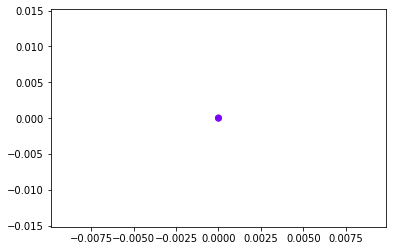

In [73]:
## Experiment That didn't work out
obj2.matrix_clus()

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(obj2.p2)



print(cluster.labels_)


plt.scatter(obj2.p2[:,0],obj2.p2[:,1], c=cluster.labels_, cmap='rainbow')